In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

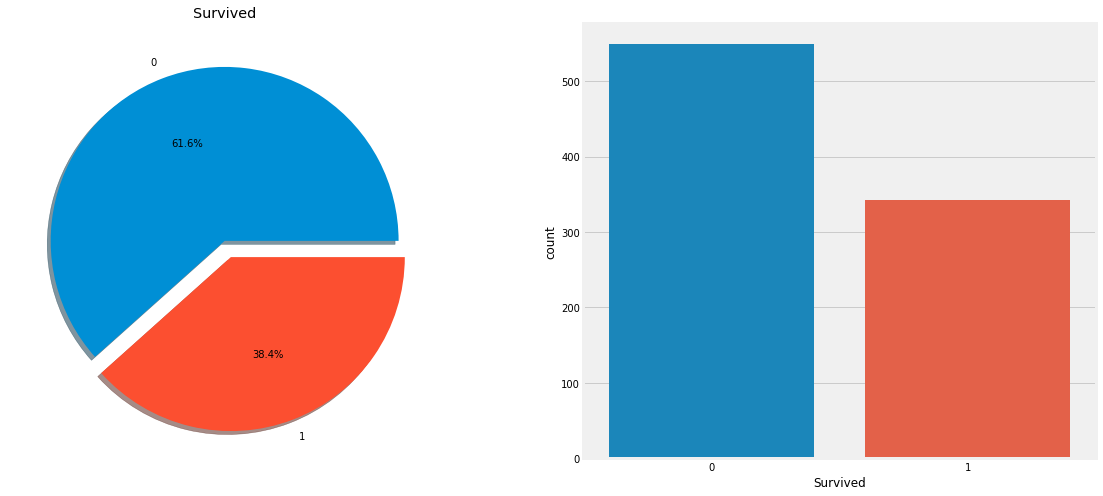

In [5]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',
                                        ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[0].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

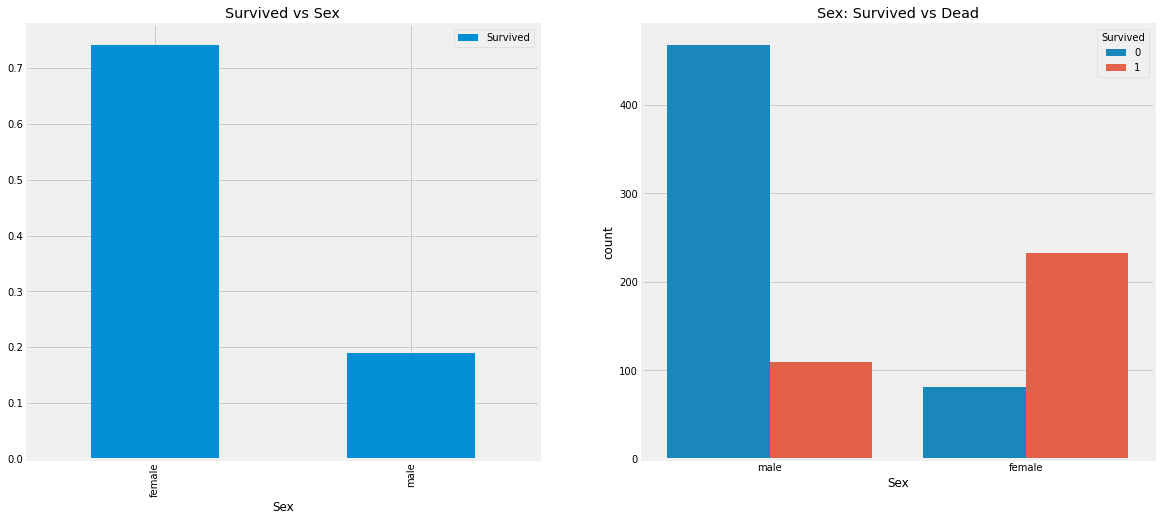

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


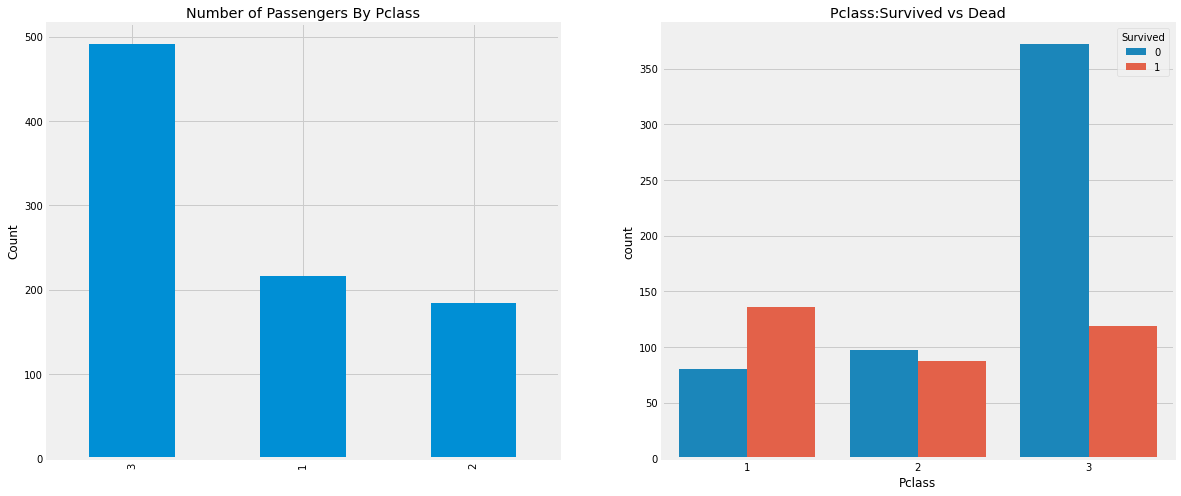

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data.Pclass.value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins= True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

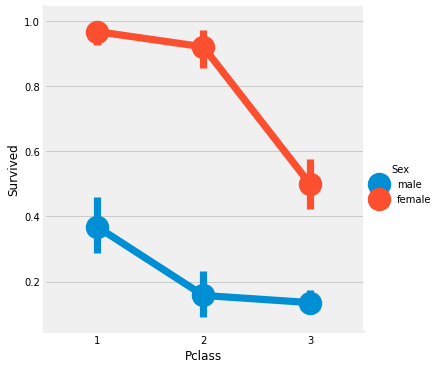

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

In [12]:
print('Oldes', data.Age.max())
print('Young', data.Age.min())
print('mean', data.Age.mean())

Oldes 80.0
Young 0.42
mean 29.69911764705882


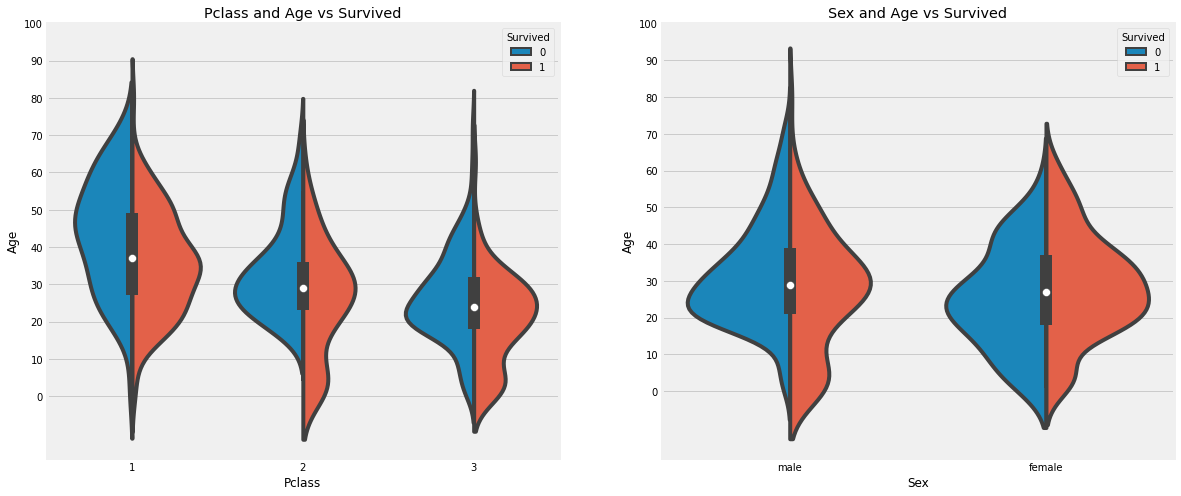

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, ax = ax[0], split = True)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, ax = ax[1], split=True)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial, data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())& (data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any()

False

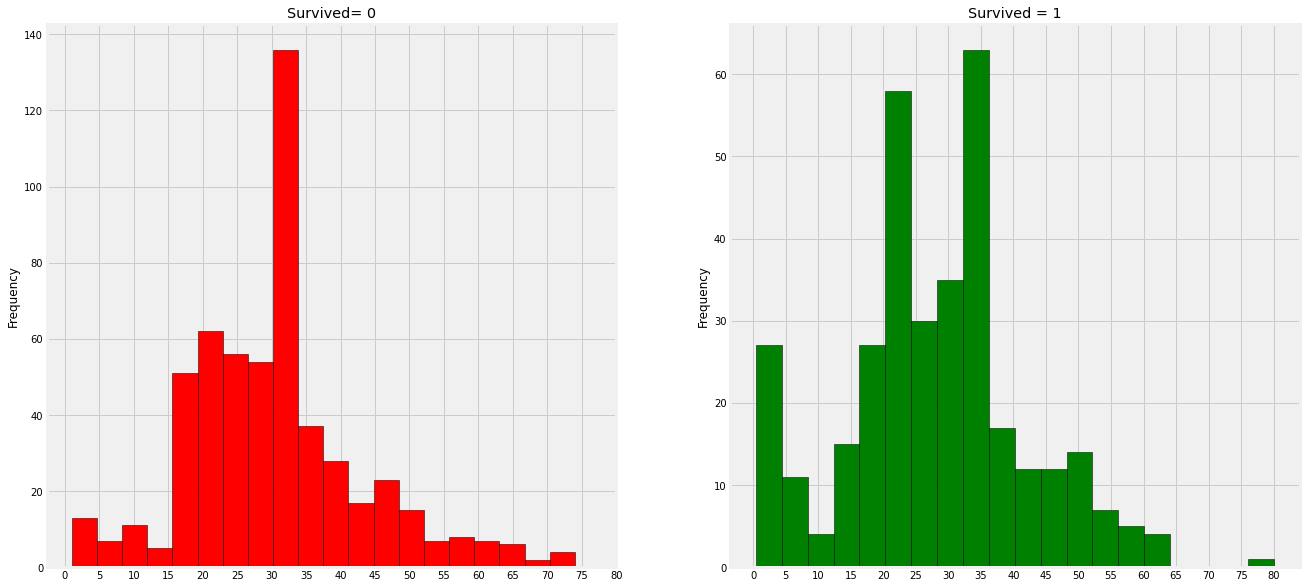

In [20]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data.loc[data.Survived == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black',
                                          color = 'red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data.loc[data.Survived == 1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black',
                                          color = 'green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()

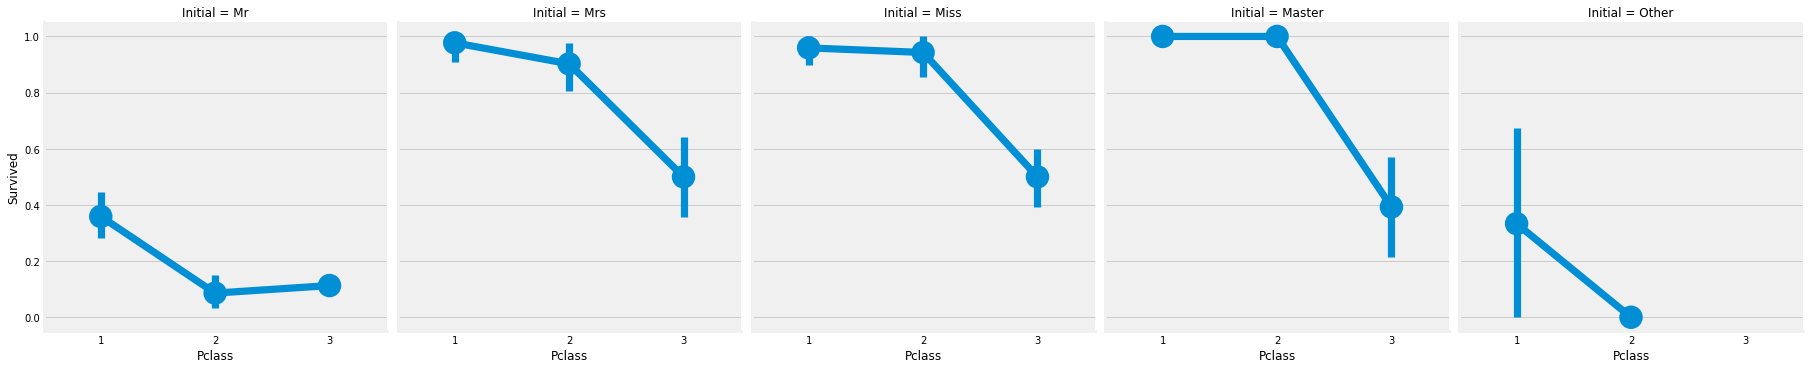

In [21]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data =data)
plt.show()

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

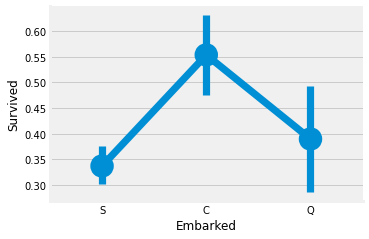

In [23]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

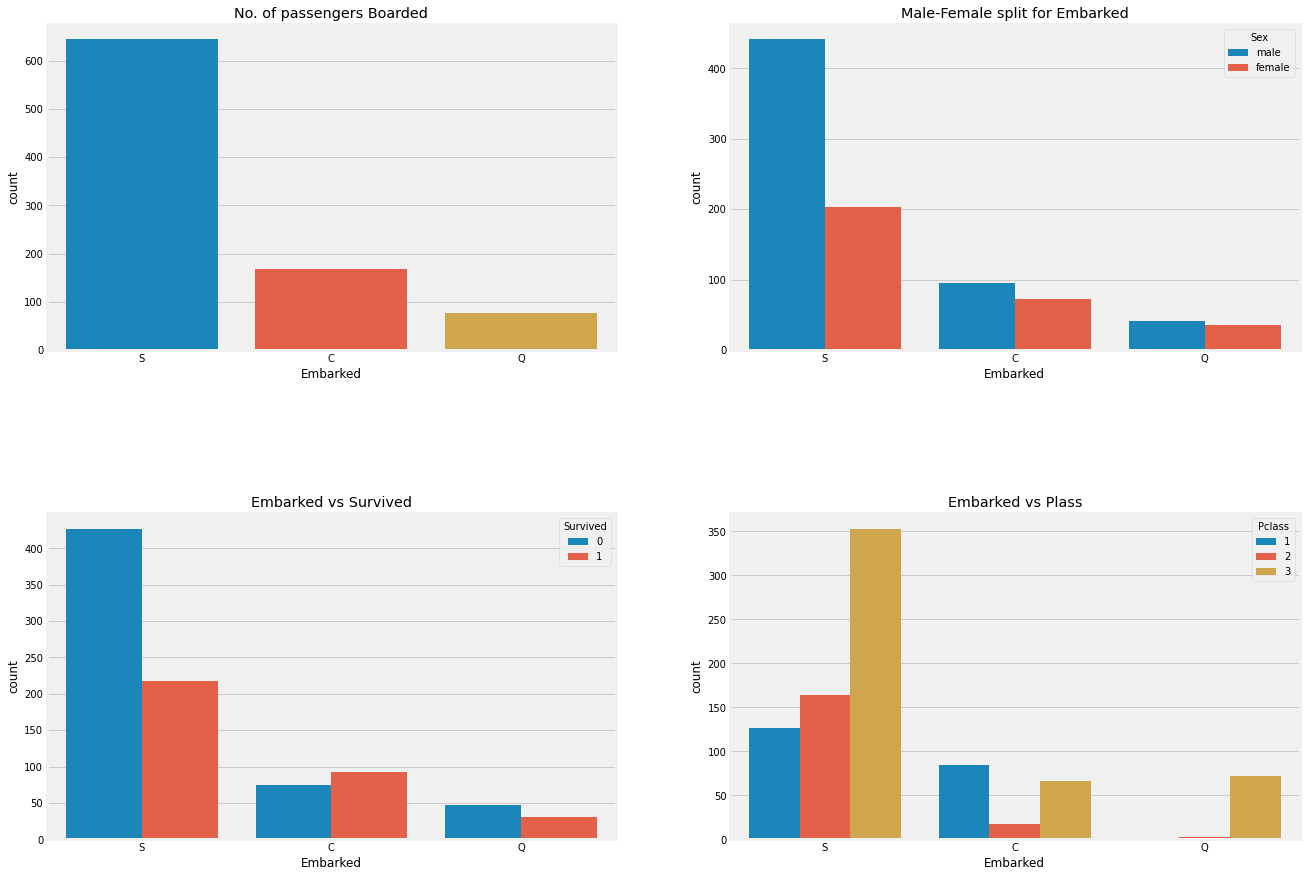

In [24]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title('No. of passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data =data, ax = ax[1, 1])
ax[1, 1].set_title('Embarked vs Plass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

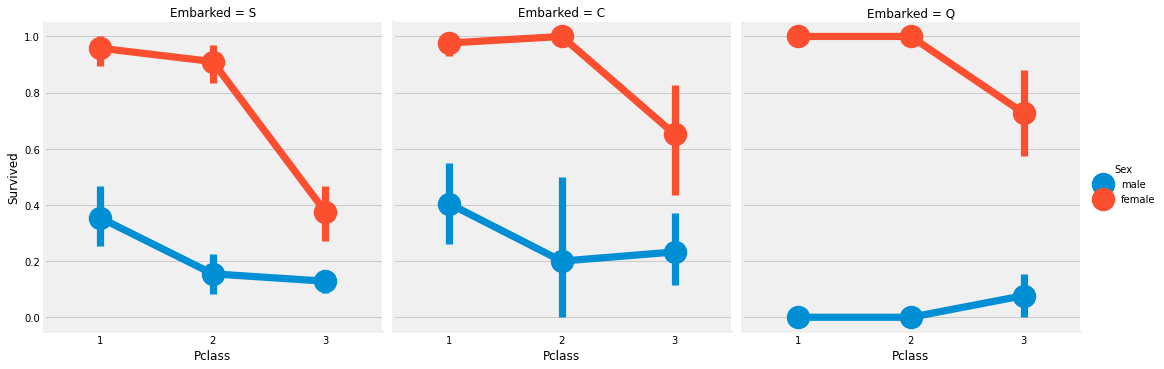

In [25]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

In [26]:
data['Embarked'].fillna('S', inplace = True)

In [27]:
data.Embarked.isnull().any()

False

In [28]:
pd.crosstab([data.SibSp], [data.Survived])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


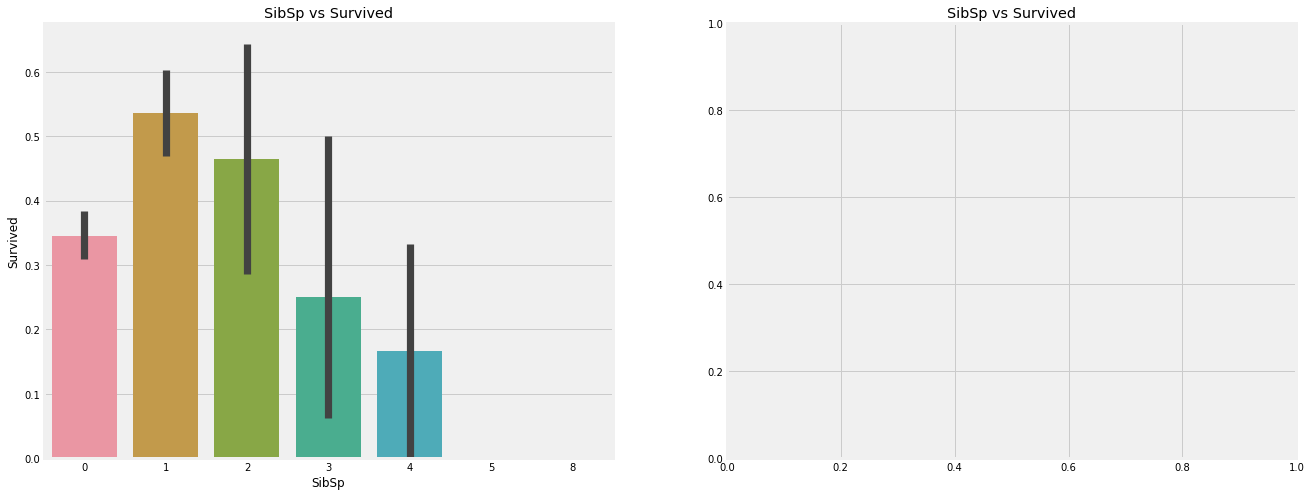

In [29]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [31]:
pd.crosstab(data.Parch, data.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [32]:
print('high', data['Fare'].max())
print('low', data['Fare'].min())
print('mean', data.Fare.mean())

high 512.3292
low 0.0
mean 32.204207968574636


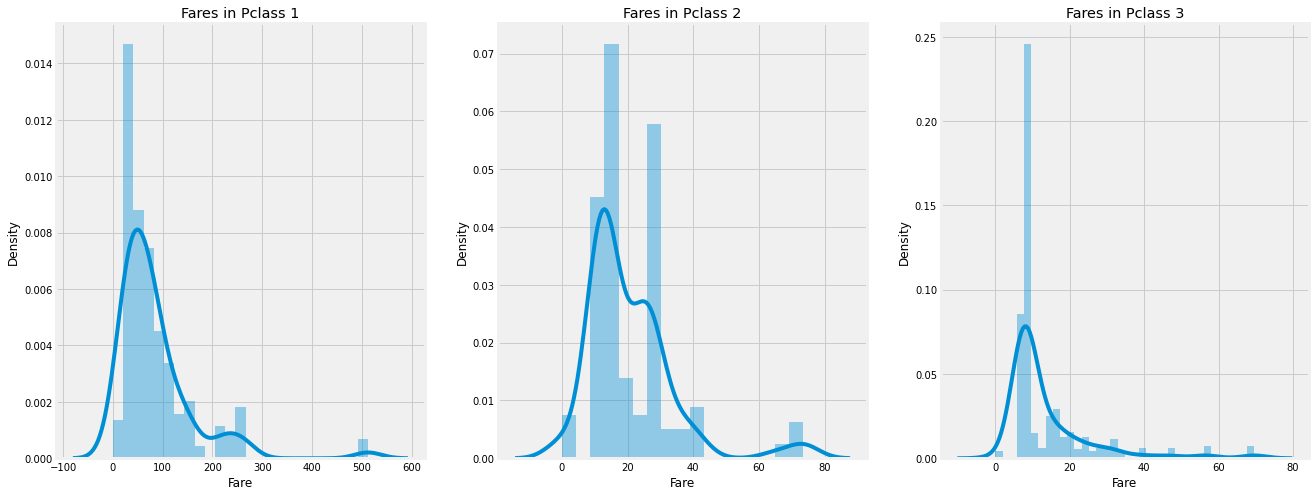

In [33]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

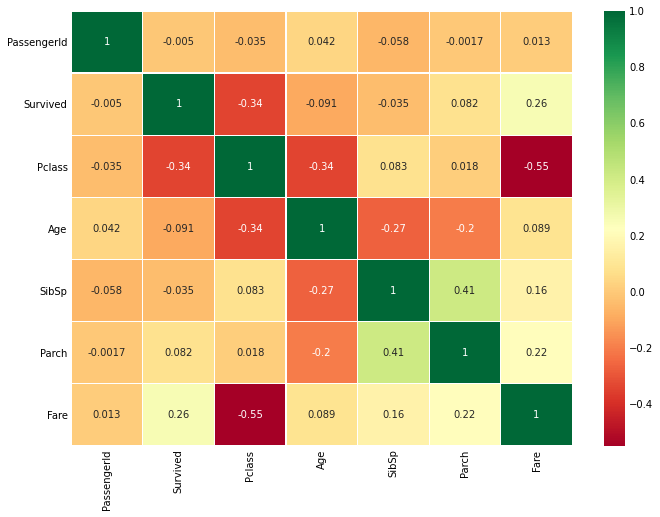

In [34]:
sns.heatmap(data.corr(), annot=True, cmap = 'RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [35]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


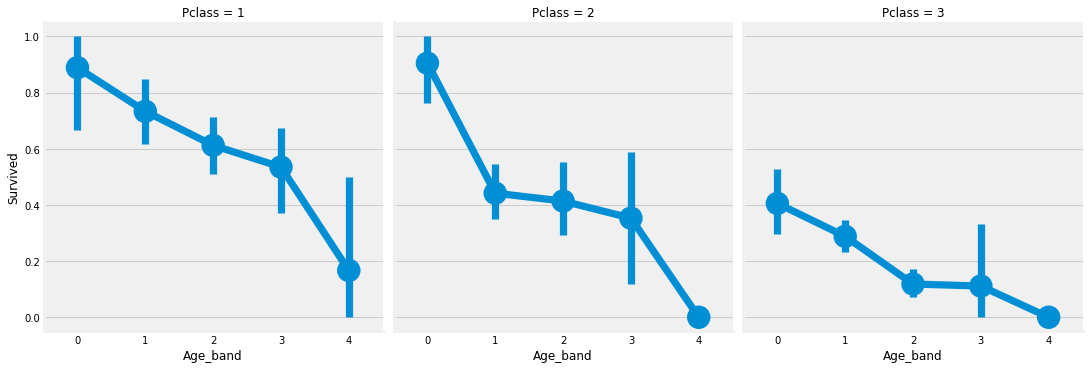

In [37]:
sns.factorplot('Age_band', 'Survived', data= data, col = 'Pclass')
plt.show()

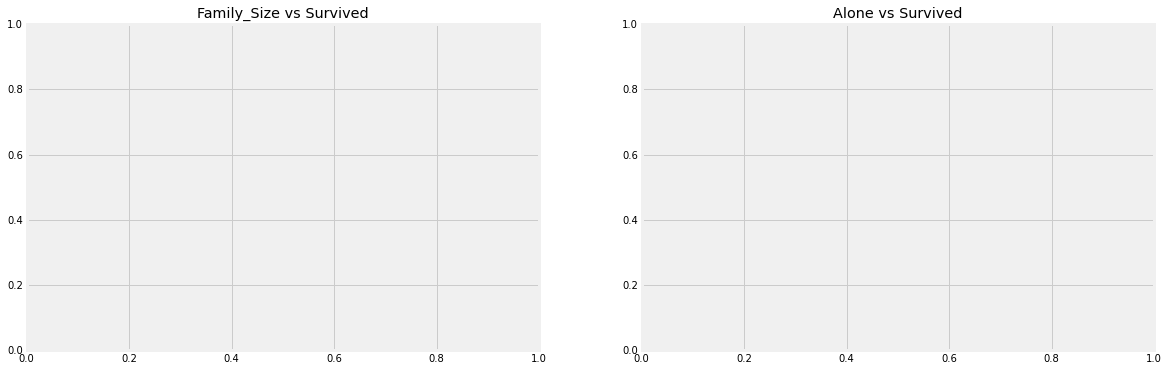

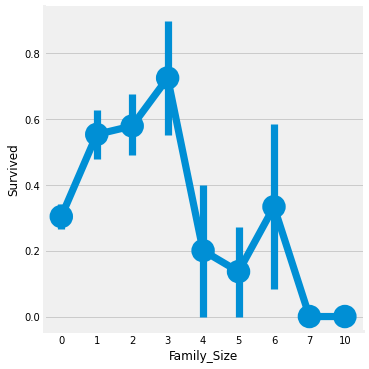

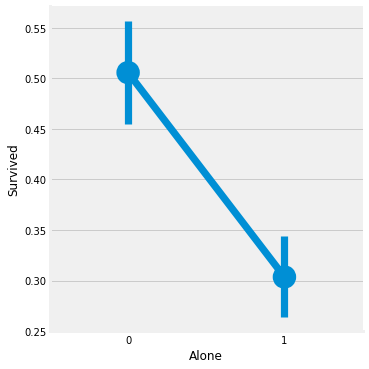

In [38]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.factorplot('Family_Size', 'Survived', data = data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data = data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

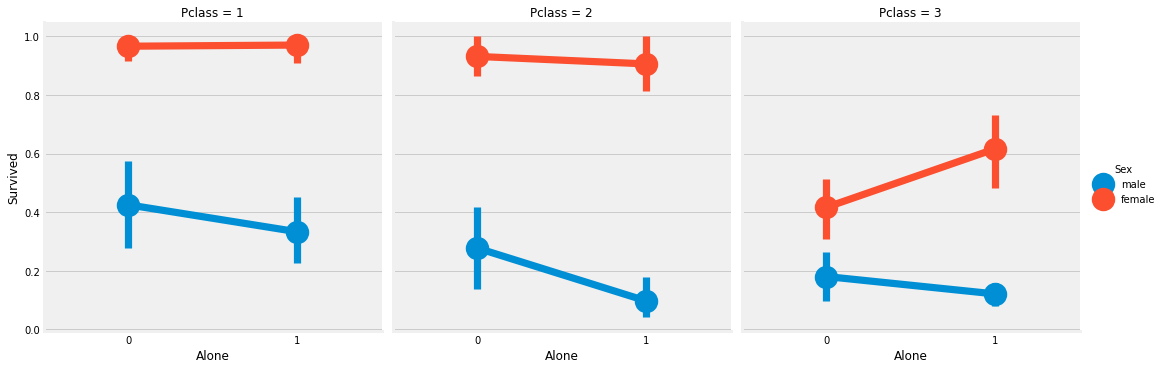

In [39]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [41]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

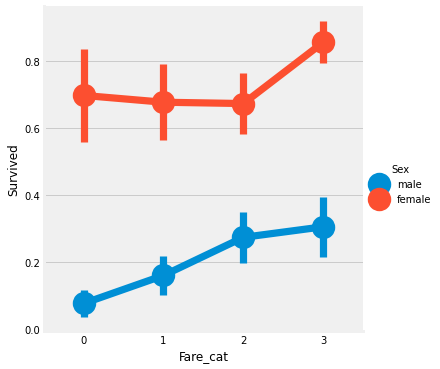

In [42]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

In [43]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

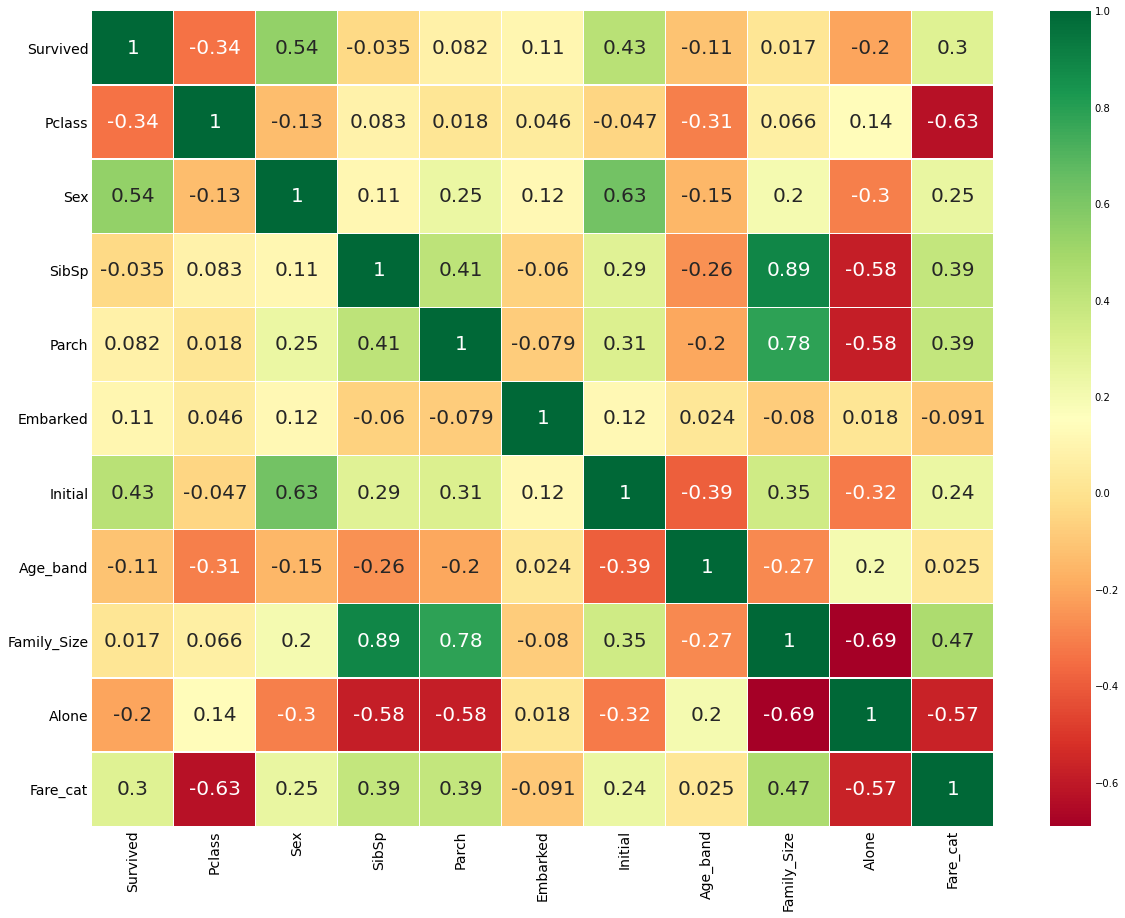

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [50]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('acc', metrics.accuracy_score(prediction1, test_Y))

acc 0.835820895522388


In [51]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('acc', metrics.accuracy_score(prediction2, test_Y))

acc 0.8171641791044776


In [52]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('acc', metrics.accuracy_score(prediction3, test_Y))

acc 0.8134328358208955


In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('acc', metrics.accuracy_score(prediction4, test_Y))

acc 0.8059701492537313


In [54]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('acc', metrics.accuracy_score(prediction5, test_Y))

acc 0.832089552238806


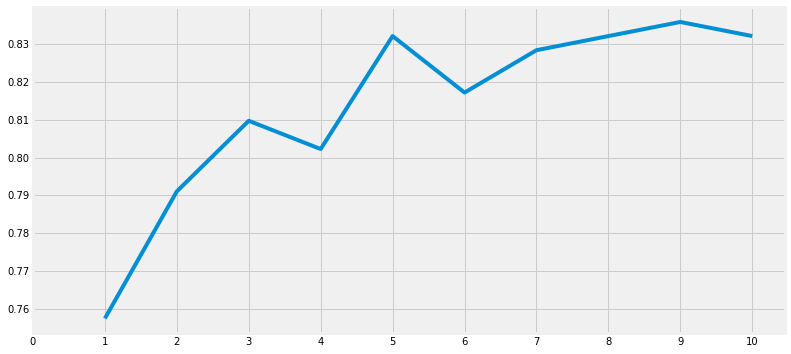

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [56]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [57]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print(metrics.accuracy_score(prediction6, test_Y))

0.8134328358208955


In [58]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print(metrics.accuracy_score(prediction7, test_Y))

0.8171641791044776


In [62]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle = True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.040287
Decision Tree,0.801361,0.049945
Naive Bayes,0.795843,0.054861
Random Forest,0.810362,0.038526


<AxesSubplot:>

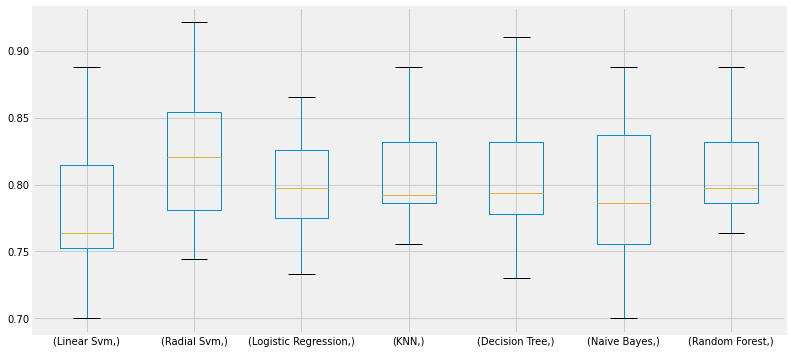

In [63]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

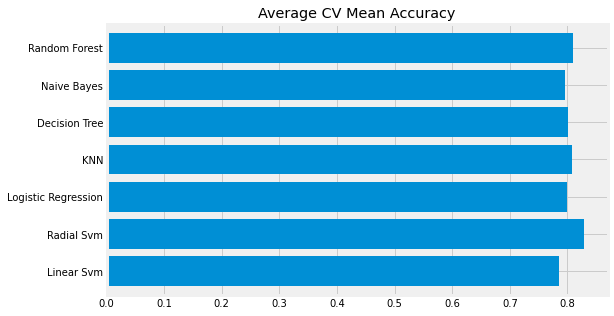

In [64]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

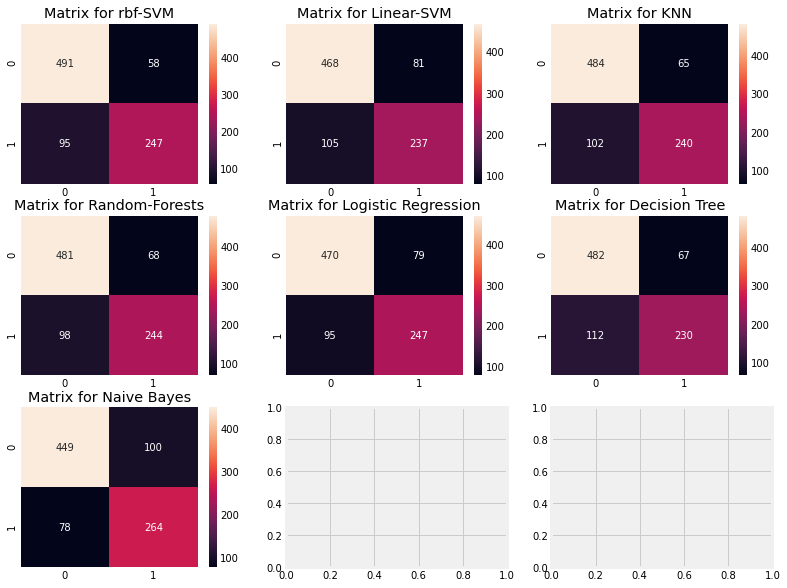

In [65]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [67]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [68]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


In [69]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


In [70]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [76]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


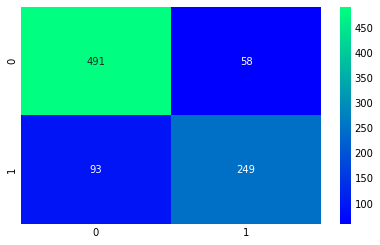

In [77]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

NameError: name 'xg' is not defined

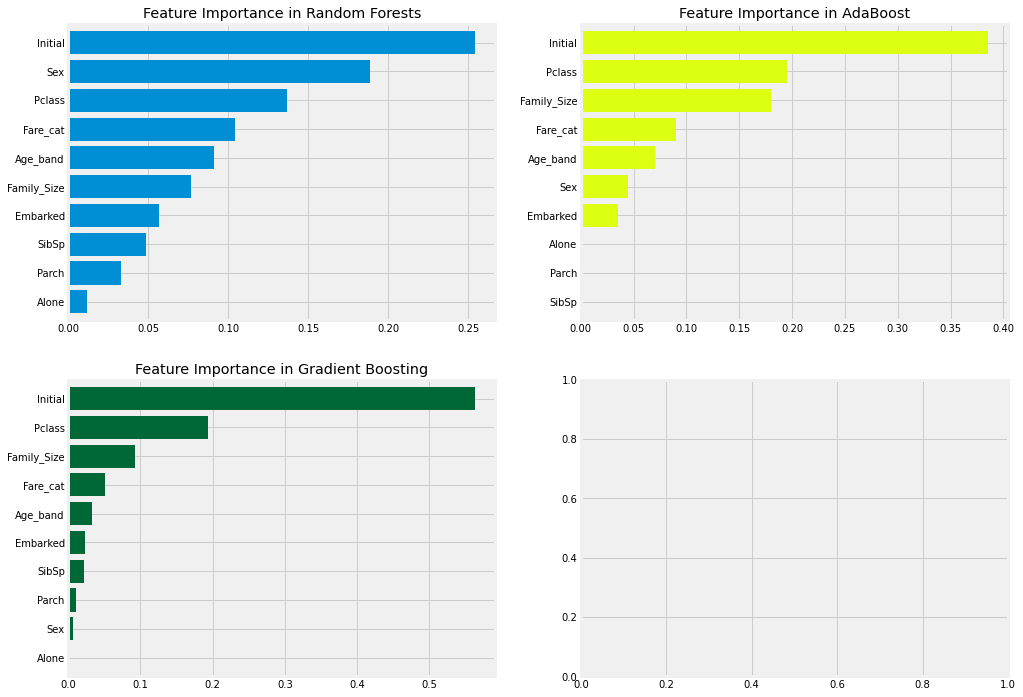

In [78]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()